<a href="https://colab.research.google.com/github/saro0307/AI-detector/blob/main/AI_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv ('/content/chatgpt_paraphrases.csv')
print(df)
print(df.shape)

In [ ]:
df['text'][1]
df['paraphrases'][1]

In [ ]:
category={}
for i in range(len(df)):
    chatgpt=df.iloc[i]["paraphrases"][1:-1].split(', ')
    for j in chatgpt[:1]:
        category[j[1:-1]]='chatgpt'
    category[df.iloc[i]['text']]="human"

category

In [ ]:
df=pd.DataFrame(category.items(),columns=["text","category"])
df=df.sample(frac=1)
df=df[:20000]
df

In [ ]:
df["category"].value_counts()

In [24]:
X=df['text']
y=df['category']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [28]:
lg = LogisticRegression(penalty='l1',solver='liblinear')
sv = SVC(kernel='sigmoid',gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bg = BaggingClassifier(n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [ ]:
def prediction(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pr = model.predict(X_test)
    acc_score = metrics.accuracy_score(y_test, pr)
    f1 = metrics.f1_score(y_test, pr, average="binary", pos_label="chatgpt")
    return acc_score, f1

acc_score = {}
f1_score = {}
clfs = {
    'LR': lg,
    'SVM': sv,
    'DTC': dtc,
    'KNN': knn,
    'RFC': rfc,
    'ETC': etc,
    'ABC': abc,
    'BG': bg,
    'GBC': gbc,
}
for name, clf in clfs.items():
    acc_score[name], f1_score[name] = prediction(clf, X_train_tfidf, X_test_tfidf, y_train, y_test)

# View those scores
for name, acc in acc_score.items():
    print(f'Accuracy for {name}: {acc}')

for name, f1 in f1_score.items():
    print(f'F1 score for {name}: {f1}')


In [ ]:
etc.fit(X_train_tfidf,y_train)

In [ ]:
y_preddf=pd.DataFrame(y_pred)
y_preddf.rename(columns={0:'category predicted'},inplace=True)
y_preddf

In [ ]:
x_testdf=pd.DataFrame(X_test)
y_testdf=pd.DataFrame(y_test)
x_testdf['id'] = range(1, len(x_testdf) + 1)
y_testdf['id'] = range(1, len(y_testdf) + 1)
y_preddf['id'] = range(1, len(y_preddf) + 1)
join1=y_testdf.merge(x_testdf, how = 'inner' ,indicator=False)
join_df=join1.merge(y_preddf, how = 'inner' ,indicator=False)
join_df[20:30]

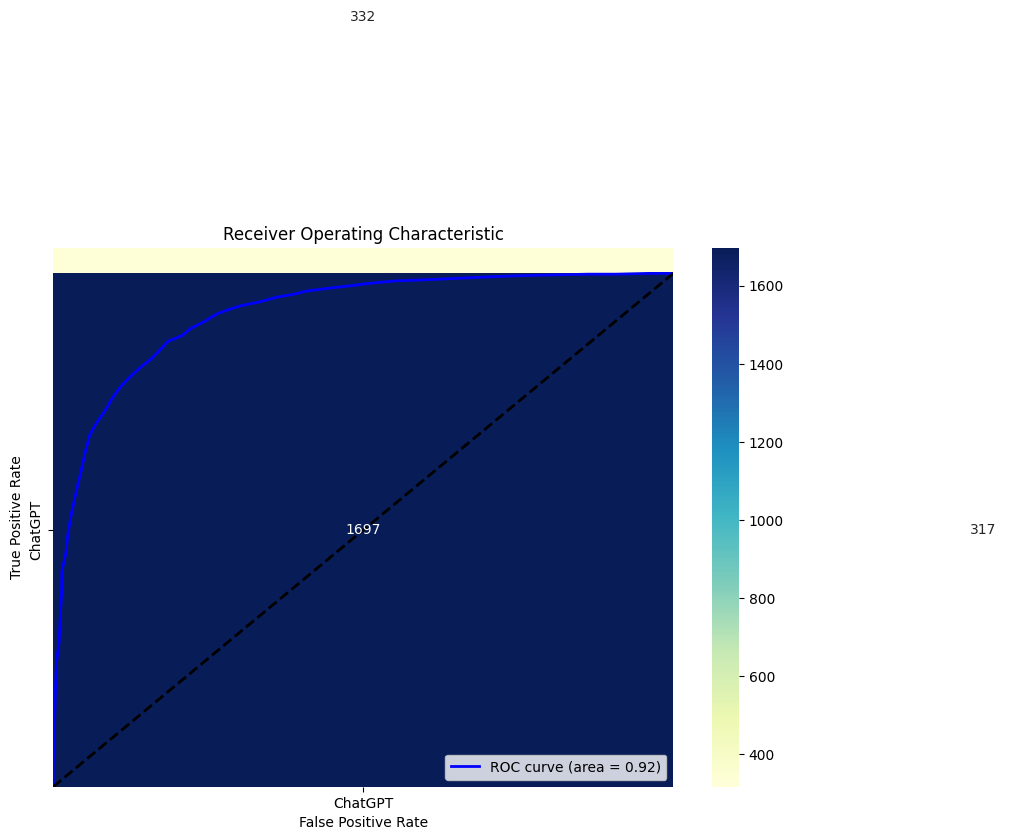

In [53]:
# confusion matrix

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(cm, index = [i for i in ["ChatGPT","Human"]],
                  columns = [i for i in ["ChatGPT","Human"]])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="YlGnBu", fmt='g')

# roc curve

from sklearn.metrics import roc_curve,auc
y_prob = etc.predict_proba(X_test_tfidf)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='human')

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [48]:
accuracy_score=metrics.accuracy_score(y_pred,y_test)*100
accuracy_score

83.775

In [50]:
input=['Hello!! This is Ana']
vect_input=vectorizer.transform(input)
etc.predict(vect_input)

#array(['human'], dtype=object)

input=['Hello!! This is chatgpt']
vect_input=vectorizer.transform(input)
etc.predict(vect_input)

#array(['human'], dtype=object)

input=['Can you please provide a step by step guide for writing articles online']
vect_input=vectorizer.transform(input)
etc.predict(vect_input)

#array(['chatgpt'], dtype=object)

input=['These are the websites for watching movies that I can recommend you']
vect_input=vectorizer.transform(input)
etc.predict(vect_input)

#array(['chatgpt'], dtype=object)

array(['chatgpt'], dtype=object)